In [ ]:
# 1번 문제 

In [1]:
from konlpy.tag import Kkma
from selenium import webdriver 
from bs4 import BeautifulSoup
import requests
import newspaper 

In [2]:
url = "https://fs.jtbc.joins.com/RSS/economy.xml"

In [3]:
meta_url = requests.get(url)
parser = BeautifulSoup(meta_url.content,'xml')
links = parser.select("item > link")
result = ""
kkma = Kkma()
for link in links:
    article = newspaper.Article(link.text, language='ko')
    article.download()
    article.parse()
    result += article.text

result = set(kkma.nouns(result))
result

C:\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


{'기승',
 '소비',
 '3년',
 '공중충돌',
 '접근',
 '자산',
 '전',
 '시행',
 '준호',
 '인증서류',
 '신속',
 '27억',
 '자금',
 '산업',
 '타결',
 '사면',
 '뿐',
 '형태',
 '억',
 '차',
 '이용',
 '3개월',
 '대형',
 '55인치',
 '한국콜마의',
 '입주민',
 '제주',
 '건조',
 '코리아',
 '대출',
 '배출가스',
 '서비스',
 '그룹',
 '구조',
 '앵커',
 '재난안전',
 '불만',
 '사고',
 '서초구',
 '13세',
 '상조회사',
 '아침',
 '개인',
 '지시',
 '항공당국',
 '앱',
 '경제부총리',
 '악천후',
 '오늘',
 '환송',
 '촉구',
 '항소심',
 '한일',
 '11만',
 '파이낸셜',
 '최순실',
 '연구원',
 '화물',
 '선박',
 '6시',
 '의무적',
 '가운데',
 '폰',
 '개발',
 '뉴스',
 '진행',
 '운영',
 '솔',
 '닛산',
 '240만',
 '카페',
 '혼잡',
 '상대',
 '행정',
 '불매운동',
 '저',
 '사내',
 '이명',
 '도',
 '퇴출',
 '시기',
 '테두리',
 '경증환자',
 '결제',
 '공장',
 '안',
 '8일',
 '과열',
 '합의',
 '공정거래위원회',
 '기자내일',
 '업계',
 '관제',
 '지혜',
 '구현',
 '스타',
 '아동학대',
 '시험',
 '주의',
 '밑부분',
 '판매',
 '집당',
 '요구',
 '11',
 '튜브',
 '국제가전박람회',
 '전시회',
 '오',
 '예정',
 '신중',
 '인용',
 '가격',
 '감독원',
 '일',
 '본격적',
 '탈출',
 '작업',
 '대규모',
 '커뮤니케이션',
 '서류',
 '동연',
 '8000',
 '광고',
 '혼다',
 '방침',
 '필요',
 '9만여',
 '방지',
 '평균',
 '훈장',
 '긴급구호',
 '엔진',
 '벤츠',
 '갈등',
 '공

In [ ]:
#2번 문제 

In [4]:
word_Korean = ["추석","연휴","민족","대이동","시작","늘어","교통량","교통사고","특히","자동차","고장","상당수","차지","나타","것","기자"]
stopwords = ["가다","늘어","나타","것","기자"]

result = [word for word in word_Korean if word not in stopwords]
result

['추석', '연휴', '민족', '대이동', '시작', '교통량', '교통사고', '특히', '자동차', '고장', '상당수', '차지']

In [6]:
#3번 문제

In [7]:
from selenium import webdriver
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pymongo
from pymongo import MongoClient
import pandas as pd 
import time

In [8]:
meta_url = "http://www.yes24.com/Product/goods/40936880"

driver = webdriver.Chrome(executable_path="chromedriver.exe")
driver.get(meta_url)

title =[]
point = []
date = []
review = []

box = driver.find_elements_by_css_selector("#infoset_reviewContentList > .reviewInfoGrp")


for arr in box:
    time.sleep(2)
    title.append(arr.find_element_by_css_selector(".reviewInfoTop > .review_tit > span.txt").text)
    point.append(arr.find_element_by_css_selector(".review_rating > span").text)
    date.append(arr.find_element_by_css_selector(".reviewInfoTop > .review_etc > em.txt_date").text)
    review.append(arr.find_element_by_css_selector("div.review_cont").text)


In [9]:
df = pd.DataFrame({'title':title, "point":point, "date":date , "review":review})
df

,title,point,date,review
0,명견만리...새로운 세상을 보았다.,평점5점,2019-07-25,텔레비전에 명견만리 라는 프로가 있다는것은 익히 들었다.그러나 단 한번도 본적이 없...
1,명견만리-지금을 보는 눈,평점5점,2019-06-17,"내가 살고 있는 지금 사회 문제는 무엇인지, 무엇을 고민하고 생각해봐야하는지 놓치는..."
2,명견만리: 새로운 사회,평점5점,2019-03-11,이 책은 격변하는 시대에 필요한 밝은 통찰과 과감한 상상력을 보여준 '명견만리' 시...
3,나머지 세권도 구매 했어요~,평점5점,2019-02-25,정말 탄탄한 구성의 책이었습니다.예전에 EBS 방송을 책으로 펴낸 '자본주의'를읽었...
4,사회적 갈등을 위한 최고의 책,평점5점,2018-12-10,에스토니아의 학교에서의 수업을 보면 그들의 저력을 짐작할 수 있다. 유치원부터 코팅...


In [10]:
client = MongoClient("localhost",27017)
db = client.test
info = db['Insight']

for index in range(len(title)):
    db.Insight.insert_one({
                'title' :title[index],
                'point' :point[index],
                'date' : date[index],
                'review' : review[index]
            })



In [11]:
import re
doc = db.Insight.find({},{"review":1 , "_id":0})
text = ""

for arr in doc:
    text += str(arr.values())
    
text =re.sub(r"dict_values","",text)
text =re.sub(r"\(","",text)
text =re.sub(r"\)","",text)
text =re.sub(r"\[","",text)
text =re.sub(r"\]","",text)
text =re.sub(r"\\","",text)
text

'\'텔레비전에 명견만리 라는 프로가 있다는것은 익히 들었다.그러나 단 한번도 본적이 없다. 대신 모프로에서 나오는 명사?들이 나오는 이야기는 시청하였다.세상은 결코 가만히 있는 사람에게는 아무런 기회가 없으며, 당연히 그 에 따른 결과도 없는것이 아니라기대할것이 없다.당장 지금부터라도 가지고 있는 생각을 실천하자.더 이상 말이 필요없다.단 하나만이...\'\'내가 살고 있는 지금 사회 문제는 무엇인지, 무엇을 고민하고 생각해봐야하는지 놓치는 경우가 많다. 바로 나와 내 가족, 내가 먹고 시는 일에 직결이 되는 일임에도 불구하고, 전조등과 소리 없이 다가오는 자동차와 같은 일들. 이것을 잡아 타면 남들보다 빠르고 편안하게 먼 길을 갈 수 있지만, 이를 미처 알지 못하고 있으면 놓치는 것은 물론, 어물하다가...\'"이 책은 격변하는 시대에 필요한 밝은 통찰과 과감한 상상력을 보여준 \'명견만리\' 시리즈의 세 번째 작품이다. 이번 『명견만리: 새로운 사회 편』에서는 ‘정치, 생애, 직업, 탐구’ 네 주제를 통해 과거와 확연히 다른 모습으로 다가올 새로운 사회를 조망하고 더 나은 세상을 만들기 위해 이미 현실에서 실현되고 있는 대안들을 제시한다. 이번에 주목한 주제는...""정말 탄탄한 구성의 책이었습니다.예전에 EBS 방송을 책으로 펴낸 \'자본주의\'를읽었을 때와 유사한 기분 이었습니다.인터넷 검색하면 누구나 찾을 수 있는 자료를 엮어서 간단한 의견을 덧붙인 여타 책들과는 다른 것 같아요.한땀한땀 정성을 다해 조사하고, 독자적으로 인터뷰하고, 그를 바탕으로 깊이 있는 의견까지. 정성이 느껴졌습니다.나머지 세권도 구매 했어..."\'에스토니아의 학교에서의 수업을 보면 그들의 저력을 짐작할 수 있다. 유치원부터 코팅 교육을 체계적으로 실시한다. 프로그램을 짜고 실행하며 저절로 논리를 배우고 수학적 사고력을 키운다. 에스토니아는 전 세계 국가를 대상으로 전자시민을 모집하고 있다. 우리나라 돈으로 12만원이면 에스토니아 디지털국가를 취득할 수 있다고 한다. 디지털 

In [12]:
KOKOMA = Kkma()

In [13]:
word_list = KOKOMA.nouns("%r"%text)
word_list = [word for word in word_list if len(word)> 1]
word_list

['텔레비전',
 '명견',
 '명견만리',
 '만리',
 '프로',
 '한번',
 '본적',
 '대신',
 '모프로',
 '명사',
 '이야기',
 '시청',
 '세상',
 '사람',
 '기회',
 '결과',
 '기대',
 '당장',
 '지금',
 '라도',
 '생각',
 '실천',
 '이상',
 '하나',
 '하나만이',
 '만이',
 '사회',
 '문제',
 '무엇',
 '무엇',
 '고민',
 '경우',
 '가족',
 '내가',
 '직결',
 '일임',
 '전조등',
 '소리',
 '자동차',
 '이것을',
 '편안',
 '물론',
 '어물',
 '격변',
 '시대',
 '필요',
 '통찰',
 '상상력',
 '시리즈',
 '번째',
 '작품',
 '이번',
 '정치',
 '생애',
 '직업',
 '탐구',
 '주제',
 '과거',
 '모습',
 '조망',
 '현실',
 '실현',
 '대안',
 '제시',
 '이번',
 '주목',
 '구성',
 '예전',
 '방송',
 '자본',
 '자본주의',
 '주의',
 '유사',
 '기분',
 '인터넷',
 '검색',
 '누구',
 '자료',
 '의견',
 '여타',
 '정성',
 '조사',
 '독자적',
 '인터뷰',
 '바탕',
 '나머지',
 '세권',
 '구매',
 '스토니',
 '스토니아의',
 '아의',
 '학교',
 '수업',
 '저력',
 '짐작',
 '유치원',
 '코팅',
 '교육',
 '체계적',
 '실시',
 '프로그램',
 '실행',
 '논리',
 '수학적',
 '사고력',
 '세계',
 '국가',
 '대상',
 '전자',
 '전자시민',
 '시민',
 '모집',
 '우리',
 '우리나라',
 '나라',
 '12',
 '12만원',
 '에스',
 '에스토',
 '디지털',
 '디지털국가',
 '취득',
 '시민증']

(-0.5, 399.5, 199.5, -0.5)

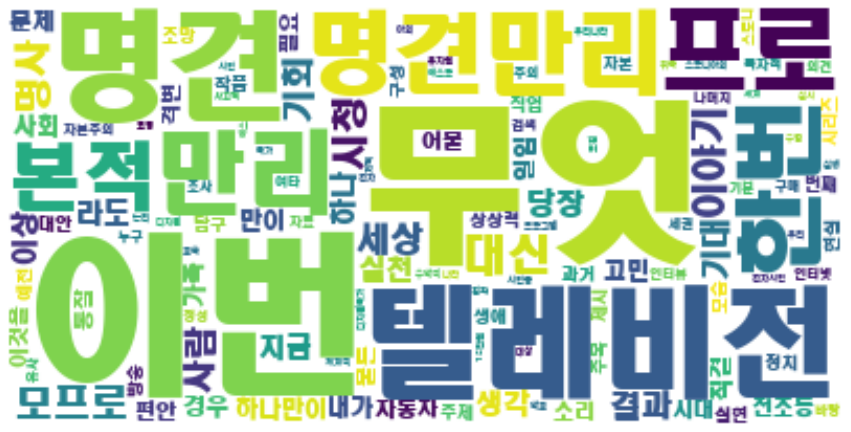

In [24]:
from wordcloud import WordCloud

result_text = " ".join(word_list)

wordclo= WordCloud(background_color="white",font_path="C:\Windows\Fonts\HMKMRHD.ttf")
wordclo.generate(result_text)

plt.figure(figsize=(15,10))
plt.imshow(wordclo, interpolation="bilinear")
plt.axis("off")